# Tratamento do datasets

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [44]:
db_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
db_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
db_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [45]:
db_deaths_country = db_deaths.groupby(['Country/Region']).sum()
db_confirmed_country = db_confirmed.groupby(['Country/Region']).sum()
db_recovered_country = db_recovered.groupby(['Country/Region']).sum()

In [46]:
db_deaths_country.drop(['Lat','Long'],axis=1,inplace=True)
db_confirmed_country.drop(['Lat','Long'],axis=1,inplace=True)
db_recovered_country.drop(['Lat','Long'],axis=1,inplace=True)

# Gráficos

In [48]:
date, days, weeks, n_weeks, n, k = db_confirmed_country.iloc[:,db_confirmed_country.shape[1]-1].name, 30, 5, 19, 6, 5

## Confirmados

In [49]:
maxconfirmed = db_confirmed_country[date].sort_values(ascending=False)[:n]

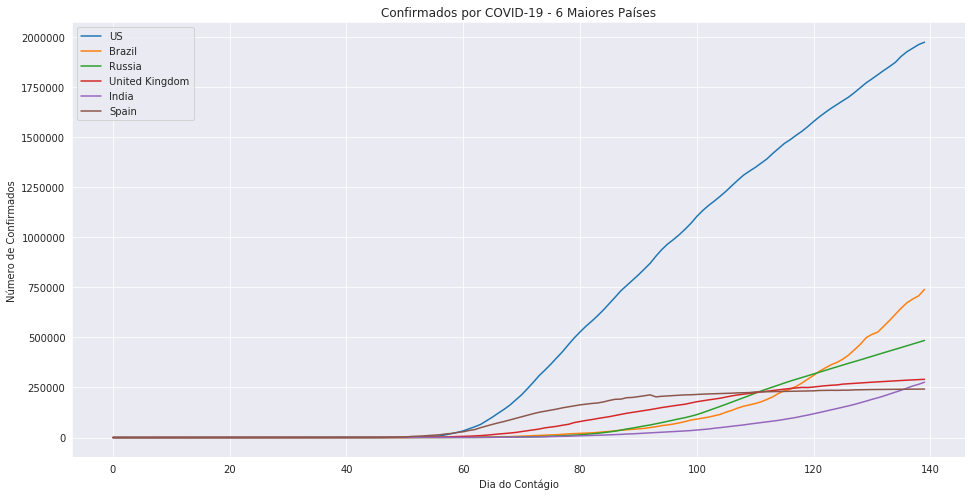

In [50]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxconfirmed.index:
  ax.plot(range(db_confirmed_country.T.shape[0]), db_confirmed_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Confirmados')
plt.title('Confirmados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
#plt.savefig('confirmedcovid.png')

In [51]:
percconfirmed = pd.DataFrame(np.zeros((db_confirmed_country.shape[1],db_confirmed_country.shape[0])), index = db_confirmed_country.columns, columns=db_confirmed_country.index)

In [52]:
for i in db_confirmed_country.T.columns:
  for j in range(db_confirmed_country.T.shape[0]-1):
    if db_confirmed_country.T[i][j] != 0:
      percconfirmed[i][j+1] = ((db_confirmed_country.T[i][j+1]- db_confirmed_country.T[i][j])/db_confirmed_country.T[i][j])

In [53]:
a = pd.DataFrame(percconfirmed.T[date].sort_values(ascending = True)).T
ixmaxconf = a[maxconfirmed.index].columns

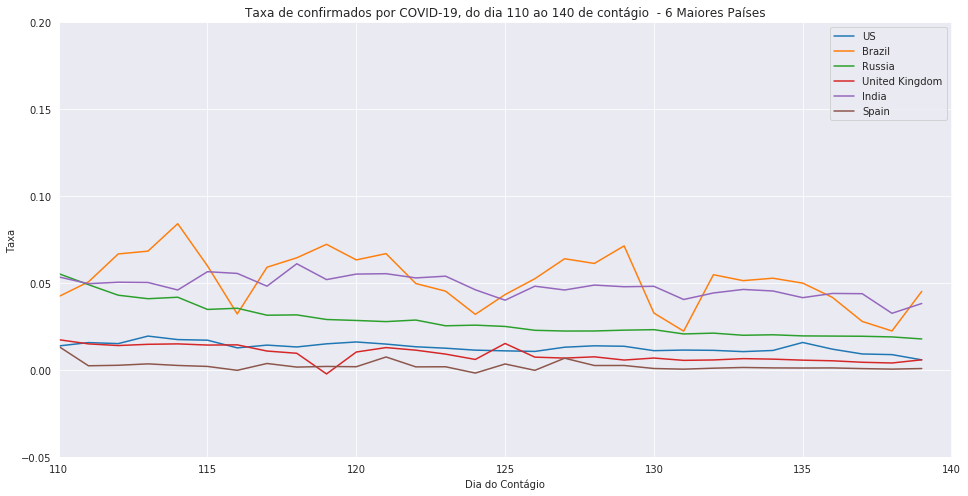

In [54]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in ixmaxconf:
  ax.plot(range(percconfirmed.shape[0]), percconfirmed[i],label=i)
  ax.set_xlim(db_confirmed_country.shape[1] - days,db_confirmed_country.shape[1])
  ax.set_ylim(-0.05,0.2)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de confirmados por COVID-19, do dia {} ao {} de contágio  - {} Maiores Países'.format(db_confirmed_country.shape[1] - days,db_confirmed_country.shape[1],n))
plt.legend()

In [55]:
idmeanconfirmed = pd.DataFrame(np.zeros((n_weeks,db_confirmed_country.T.shape[1])), index = range(n_weeks), columns=db_confirmed_country.index)
a = 0
for i in db_confirmed_country.T.columns:
    for j in range(n_weeks):
        idmeanconfirmed[i][j] = (percconfirmed[i][a:(a+7)].mean())
        a = a + 7
    a = 0

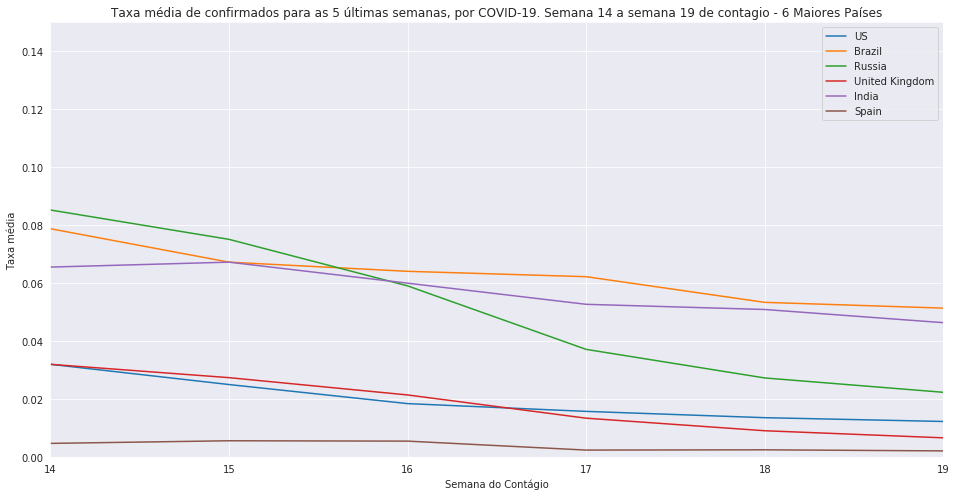

In [56]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxconfirmed.index:
  ax.plot(range(1,idmeanconfirmed.shape[0]+1), idmeanconfirmed[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(0,0.150)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Taxa média de confirmados para as {} últimas semanas, por COVID-19. Semana {} a semana {} de contagio - {} Maiores Países'.format(weeks,n_weeks - weeks,n_weeks,n))
plt.legend()

In [57]:
pd.DataFrame(maxconfirmed)

,6/9/20
Country/Region,
US,1973230
Brazil,739503
Russia,484630
United Kingdom,290581
India,276146
Spain,241966


## Mortes

In [58]:
maxdeaths = db_deaths_country[date].sort_values(ascending=False)[:n]

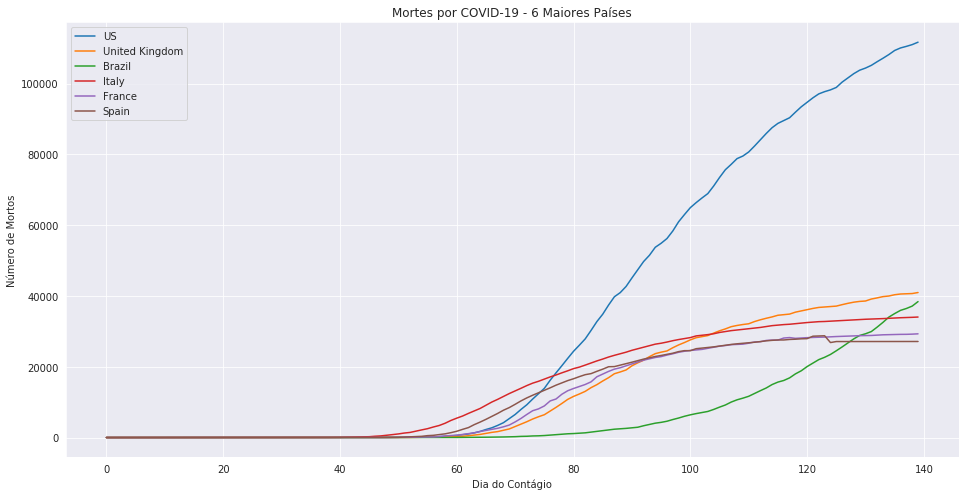

In [59]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxdeaths.index:
  ax.plot(range(db_deaths_country.T.shape[0]), db_deaths_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Mortos')
plt.title('Mortes por COVID-19 - {} Maiores Países'.format(n))
plt.legend()

In [60]:
percdeaths = pd.DataFrame(np.zeros(db_deaths_country.T.shape), index = db_deaths_country.columns, columns=db_deaths_country.index)

In [61]:
for i in db_deaths_country.T.columns:
  for j in range(db_deaths_country.T.shape[0]-1):
    if db_deaths_country.T[i][j] != 0:
      percdeaths[i][j+1] = ((db_deaths_country.T[i][j+1]- db_deaths_country.T[i][j])/db_deaths_country.T[i][j])

In [62]:
b = pd.DataFrame(percdeaths.T[date].sort_values(ascending = False)).T
ixmaxdeaths = b[maxdeaths.index].columns
ixmaxdeaths

Index(['US', 'United Kingdom', 'Brazil', 'Italy', 'France', 'Spain'], dtype='object', name='Country/Region')

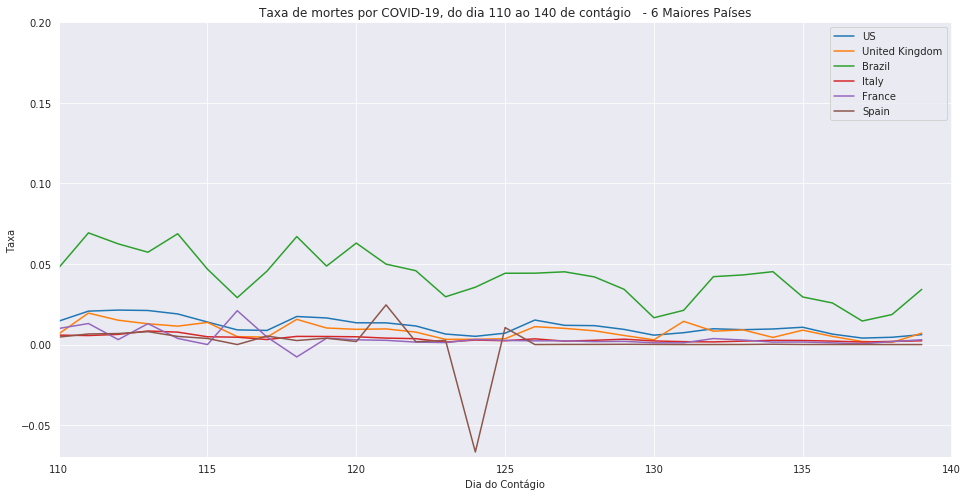

In [63]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in ixmaxdeaths:
  ax.plot(range(percdeaths.shape[0]), percdeaths[i],label=i)
  ax.set_xlim(db_deaths_country.shape[1] - days,db_deaths_country.shape[1])
  ax.set_ylim(-0.07,0.2)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de mortes por COVID-19, do dia {} ao {} de contágio   - {} Maiores Países'.format(db_deaths_country.shape[1]-days,db_deaths_country.shape[1],n))
plt.legend()

In [64]:
idmeandeaths = pd.DataFrame(np.zeros((n_weeks,db_deaths_country.T.shape[1])), index = range(n_weeks), columns=db_deaths_country.index)
a = 0
for i in db_deaths_country.T.columns:
    for j in range(n_weeks):
        idmeandeaths[i][j] = (percdeaths[i][a:(a+7)].mean())
        a = a + 7
    a = 0

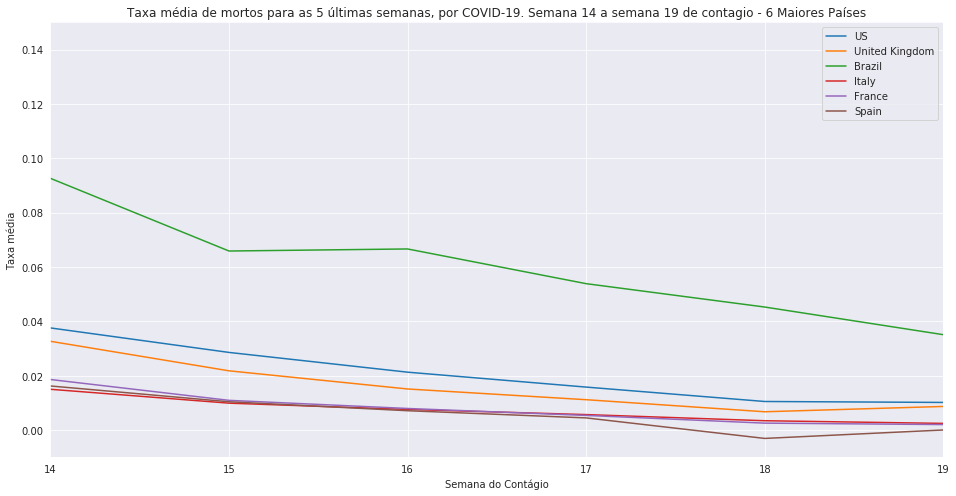

In [65]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxdeaths.index:
  ax.plot(range(1,idmeandeaths.shape[0]+1), idmeandeaths[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(-0.01,0.150)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Taxa média de mortos para as {} últimas semanas, por COVID-19. Semana {} a semana {} de contagio - {} Maiores Países'.format(weeks,n_weeks - weeks, n_weeks,n))
plt.legend()

In [66]:
pd.DataFrame(maxdeaths)

,6/9/20
Country/Region,
US,111694
United Kingdom,40968
Brazil,38406
Italy,34043
France,29299
Spain,27136


## Recuperados

In [67]:
maxrecovered = db_recovered_country[date].sort_values(ascending=False)[:n]

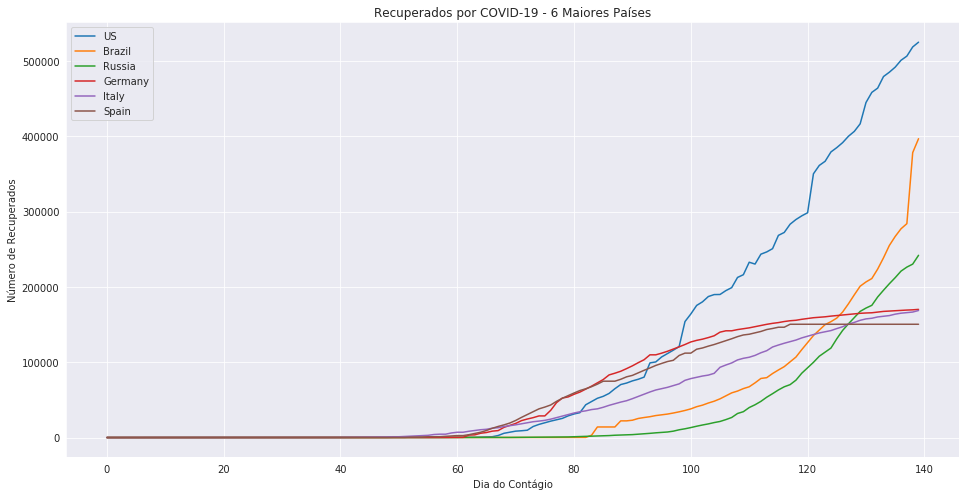

In [68]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxrecovered.index:
  ax.plot(range(db_recovered_country.T.shape[0]), db_recovered_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Recuperados')
plt.title('Recuperados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()

In [69]:
percrecovered = pd.DataFrame(np.zeros(db_recovered_country.T.shape), index = db_recovered_country.columns, columns=db_recovered_country.index)

In [70]:
for i in db_recovered_country.T.columns:
  for j in range(db_recovered_country.T.shape[0]-1):
    if db_recovered_country.T[i][j] != 0:
      percrecovered[i][j+1] = ((db_recovered_country.T[i][j+1]- db_recovered_country.T[i][j])/db_recovered_country.T[i][j])

In [71]:
b = pd.DataFrame(percrecovered.T[date].sort_values(ascending = False)).T
ixmaxrecovered = b[maxrecovered.index].columns
ixmaxrecovered

Index(['US', 'Brazil', 'Russia', 'Germany', 'Italy', 'Spain'], dtype='object', name='Country/Region')

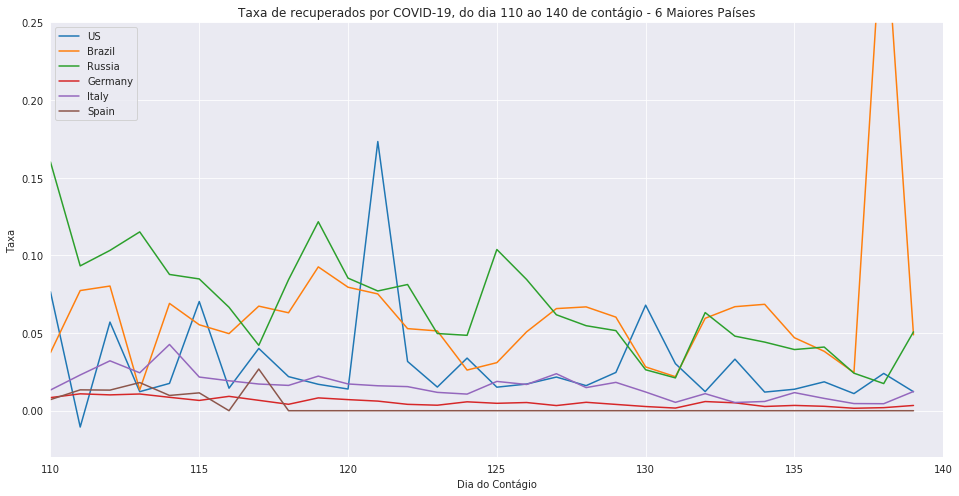

In [72]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in ixmaxrecovered:
  ax.plot(range(percrecovered.shape[0]), percrecovered[i],label=i)
  ax.set_xlim(percrecovered.shape[0] - days,percrecovered.shape[0])
  ax.set_ylim(-0.03,0.25)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de recuperados por COVID-19, do dia {} ao {} de contágio - {} Maiores Países'.format(db_recovered_country.shape[1] - days,db_recovered_country.shape[1],n))
plt.legend()

In [73]:
pd.DataFrame(maxrecovered)

,6/9/20
Country/Region,
US,524855
Brazil,396737
Russia,241917
Germany,170129
Italy,168646
Spain,150376


In [74]:
idmeanrecovered = pd.DataFrame(np.zeros((n_weeks,db_recovered_country.T.shape[1])), index = range(n_weeks), columns=db_recovered_country.index)
a = 0
for i in db_recovered_country.T.columns:
    for j in range(n_weeks):
        idmeanrecovered[i][j] = (percrecovered[i][a:(a+7)].mean())
        a = a + 7
    a = 0

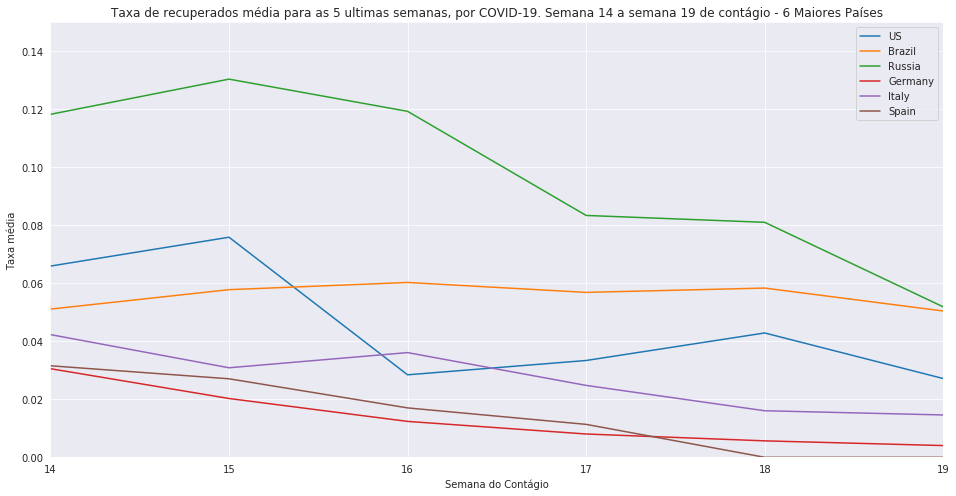

In [75]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxrecovered.index:
  ax.plot(range(1,idmeanrecovered.shape[0]+1), idmeanrecovered[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(0,0.150)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Taxa de recuperados média para as {} ultimas semanas, por COVID-19. Semana {} a semana {} de contágio - {} Maiores Países'.format(weeks, n_weeks - weeks, n_weeks,n))
plt.legend()
#plt.savefig('revoredcovid.png')

In [76]:
countries = ['Brazil','US','Russia']

situation = ['Confirmed', 'Deaths','Recovered']

idx = pd.MultiIndex.from_product([countries, situation],

                           names=['Countries', 'Situation'])

data = [idmeanconfirmed['Brazil'],
        idmeandeaths['Brazil'],
        idmeanrecovered['Brazil'],
        idmeanconfirmed['US'],
        idmeandeaths['US'],
        idmeanrecovered['US'],
        idmeanconfirmed['Russia'],
        idmeandeaths['Russia'],
        idmeanrecovered['Russia']]

data = pd.DataFrame(data,index = idx)

In [77]:
data

0         1         2         3         4  \
Countries Situation                                                     
Brazil    Confirmed  0.000000  0.000000  0.000000  0.000000  0.000000   
          Deaths     0.000000  0.000000  0.000000  0.000000  0.000000   
          Recovered  0.000000  0.000000  0.000000  0.000000  0.000000   
US        Confirmed  0.357143  0.131122  0.012987  0.011905  0.364835   
          Deaths     0.000000  0.000000  0.000000  0.000000  0.000000   
          Recovered  0.000000  0.000000  0.000000  0.000000  0.123810   
Russia    Confirmed  0.000000  0.000000  0.000000  0.000000  0.000000   
          Deaths     0.000000  0.000000  0.000000  0.000000  0.000000   
          Recovered  0.000000  0.000000  0.000000  0.000000  0.000000   

                            5         6         7         8         9  \
Countries Situation                                                     
Brazil    Confirmed  0.142857  0.611209  0.487213  0.331329  0.143887   
          Deaths     0.000000  0.000000  0.000000  0.796654  0.235359   
          Recovered  0.000000  0.000000  0.142857  0.000000  3.008333   
US        Confirmed  0.131378  0.359699  0.312505  0.364745  0.196166   
          Deaths     0.738095  0.228419  0.252506  0.338368  0.269927   
          Recovered  0.023810  0.020408  0.130952  0.958204  0.611684   
Russia    Confirmed  0.071429  0.438214  0.297327  0.235286  0.248951   
          Deaths     0.000000  0.000000  0.000000  0.000000  0.621032   
          Recovered  0.000000  0.071429  0.238095  0.166667  0.296047   

                           10        11        12        13        14  \
Countries Situation                                                     
Brazil    Confirmed  0.137603  0.088090  0.079516  0.078834  0.067311   
          Deaths     0.194364  0.122485  0.087129  0.092631  0.065895   
          Recovered  0.000000  2.424163  0.603060  0.051113  0.057819   
US        Confirmed  0.112837  0.062744  0.042275  0.032082  0.025095   
          Deaths     0.171322  0.093644  0.058741  0.037597  0.028584   
          Recovered  0.183000  0.121681  0.067338  0.065956  0.075910   
Russia    Confirmed  0.181946  0.159376  0.140079  0.085297  0.075178   
          Deaths     0.197829  0.167226  0.151547  0.096296  0.076674   
          Recovered  0.230624  0.193916  0.126356  0.118298  0.130437   

                           15        16        17        18  
Countries Situation                                          
Brazil    Confirmed  0.064149  0.062298  0.053446  0.051456  
          Deaths     0.066654  0.053883  0.045288  0.035118  
          Recovered  0.060305  0.056879  0.058372  0.050460  
US        Confirmed  0.018519  0.015838  0.013666  0.012358  
          Deaths     0.021320  0.015833  0.010535  0.010185  
          Recovered  0.028453  0.033391  0.042887  0.027164  
Russia    Confirmed  0.059125  0.037229  0.027369  0.022423  
          Deaths     0.055386  0.042791  0.042934  0.040658  
          Recovered  0.119332  0.083421  0.081053  0.051888

# Taxa de letalidade

In [78]:
tldeaths = pd.DataFrame(np.zeros((db_deaths_country.T.shape[0],db_deaths_country.T.shape[1])), index = range(db_deaths_country.T.shape[0]), columns=db_deaths_country.T.columns)
for i in maxdeaths.index:
    for j in range(len(tldeaths.index)):
        if db_deaths_country.T[i][j] == 0:
            tldeaths[i][j] = 0
        else:
            tldeaths[i][j] = (db_deaths_country.T[i][j])/(db_confirmed_country.T[i][j])

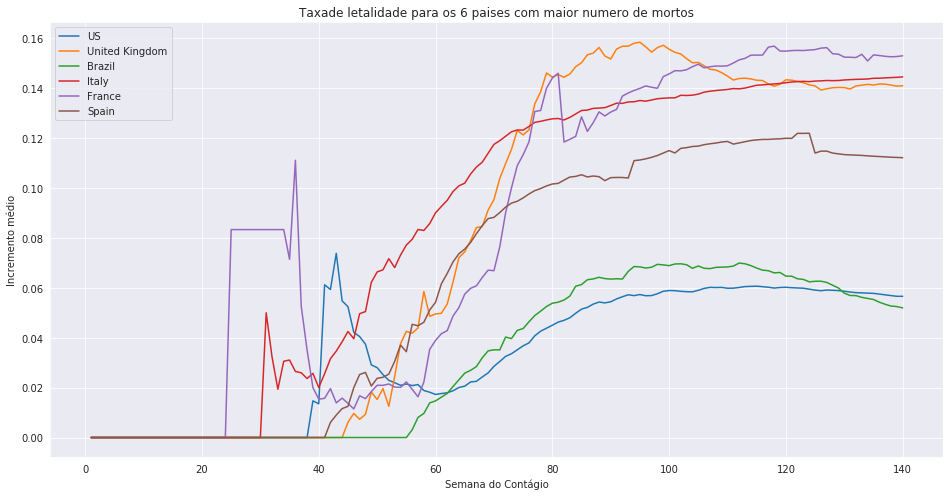

In [79]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in  maxdeaths.index:
  ax.plot(range(1,tldeaths.shape[0]+1), tldeaths[i],label=i)
plt.xlabel('Semana do Contágio')
plt.ylabel('Incremento médio')
plt.title('Taxade letalidade para os {} paises com maior numero de mortos'.format(n))
plt.legend()
plt.savefig('letalityrate.png')

# Mapa do número de confirmados no Mundo

In [80]:
data = dict(type='choropleth',
            colorscale = 'rdgy',
            reversescale = True,
            locations = db_confirmed_country.index,
            z = db_confirmed_country[date],
            locationmode = 'country names',
            marker = dict(line = dict(color = 'rgb(0,0,0)',width =1)),
            colorbar = {'title':"Casos confirmados"},
            text = db_confirmed_country.index
            ) 
layout = dict(title = 'Mapa do número de confirmados com COVID-19, por país.',
              geo = dict(scope='world',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)',
                         showframe = True,
                         projection = {'type':'natural earth'})
             )

In [81]:

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# Mapa do número de mortos no Mundo

In [82]:
data = dict(type='choropleth',
            colorscale = 'rdgy',
            reversescale = True,
            locations = db_deaths_country.index,
            z = db_deaths_country[date],
            locationmode = 'country names',
            marker = dict(line = dict(color = 'rgb(0,0,0)',width =1)),
            colorbar = {'title':"Mortos confirmados"},
            text = db_deaths_country.index
            ) 
layout = dict(title = 'Mapa do número de mortos por COVID-19, por país.',
              geo = dict(scope='world',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)',
                         showframe = True,
                         projection = {'type':'natural earth'})
             )

In [83]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# Mapa do número de recuperados no Mundo

In [84]:
data = dict(type='choropleth',
            colorscale = 'blues_r',
            reversescale = True,
            locations = db_recovered_country.index,
            z = db_recovered_country[date],
            locationmode = 'country names',
            marker = dict(line = dict(color = 'rgb(0,0,0)',width =1)),
            colorbar = {'title':"Recuperados confirmados"},
            text = db_recovered_country.index
            ) 
layout = dict(title = 'Mapa do número de recuperados do COVID-19, por país.',
              geo = dict(scope='world',
                         showframe = True,
                         projection = {'type':'natural earth'})
             )

In [85]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)